In [2]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.path.dirname('coba.ipynb'), '..')))

In [3]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from astropy.wcs import WCS
import os
import pandas as pd

In [70]:
hdu_list = fits.open('spectra_images_apogee/apogee_apo25m_stars_000+60_2M14343585+0743077.fits')
hdu_list.info()

Filename: spectra_images_apogee/apogee_apo25m_stars_000+60_2M14343585+0743077.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     121   ()      
  1                1 ImageHDU        12   (8575, 5)   float64   
  2                1 ImageHDU        12   (8575, 5)   float64   
  3                1 ImageHDU        12   (8575, 5)   int64   
  4                1 ImageHDU        12   (8575, 5)   float64   
  5                1 ImageHDU        12   (8575, 5)   float64   
  6                1 ImageHDU        12   (8575, 5)   float64   
  7                1 ImageHDU        12   (8575, 5)   float64   
  8                1 ImageHDU         5   ()      
  9                1 BinTableHDU     58   3R x 23C   [72A, D, D, D, D, D, D, D, D, D, D, D, D, D, 765D, 765D, 765D, D, D, D, D, D, 765D]   
 10                1 BinTableHDU     58   1R x 23C   [72A, D, D, D, D, D, D, D, D, D, D, D, D, D, 243D, 243D, 243D, D, D, D, D, D, 243D]   


In [71]:
f = fits.getdata('spectra_images_apogee/apogee_apo25m_stars_000+60_2M14343585+0743077.fits')
f

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype='>f8')

In [59]:
hdr = fits.getheader('spectra_images_apogee/apogee_apo1m_stars_calibration_2M18103166+5417114.fits')
hdr

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
CRVAL1  =                4.179 / Start log10(wavelength) in subsequent HDUs     
CDELT1  =                6E-06 / Dispersion in log10(wave) in subsequent HDUs   
CRPIX1  =                    1 / Pixel of starting wavelength in subsequent HDUs
CTYPE1  = 'LOG-LINEAR'         / Logarithmic wavelength scale in subsequent HDUs
DC-FLAG =                    1 / Logarithmic wavelength scale in subsequent HDUs
NWAVE   =                 8575 / Number of wavelengths in subsequent HDUs       
FIELD   = 'calibration'        / APOGEE field name                              
OBJID   = '2M18103166+5417114' / APOGEE object name                             
SNR     =    240.26670414320

In [62]:
hdul = fits.open('spectra_images_apogee/apogee_apo1m_stars_calibration_2M18103166+5417114.fits')

In [63]:
data = hdul[1].data


In [64]:
data

array([[nan, nan, nan, ..., nan, nan, nan],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype='>f8')

In [5]:
header = hdul[1].header

In [7]:
header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 8575                                                  
NAXIS2  =                   15                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
CRVAL1  =                4.179                                                  
CDELT1  =                6E-06                                                  
CRPIX1  =                    1                                                  
CTYPE1  = 'LOG-LINEAR'                                                          
BUNIT   = 'Flux (10^-17 erg/s/cm^2/Ang)'                                        

In [6]:
flux = data[0]

In [10]:
W = WCS(header,naxis=1,relax=False, fix=False)

In [11]:
lam = W.wcs_pix2world(np.arange(len(flux)),0)[0]
lam

array([4.179   , 4.179006, 4.179012, ..., 4.230432, 4.230438, 4.230444])

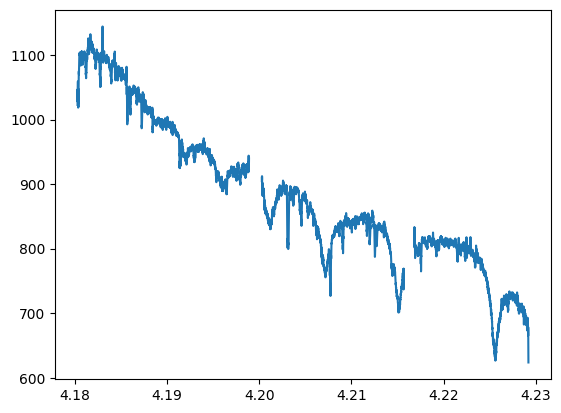

In [14]:
plt.plot(lam,flux)

In [15]:
header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 8575                                                  
NAXIS2  =                   15                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
CRVAL1  =                4.179                                                  
CDELT1  =                6E-06                                                  
CRPIX1  =                    1                                                  
CTYPE1  = 'LOG-LINEAR'                                                          
BUNIT   = 'Flux (10^-17 erg/s/cm^2/Ang)'                                        

In [15]:
f = fits.getdata('apStar-dr17-2M06010117+3214538.fits')
hdr = fits.getheader('apStar-dr17-2M06010117+3214538.fits')
nf = len(f[0])

In [21]:
crval = np.double(hdr['CRVAL1'])
cdelt = np.double(hdr['CDELT1'])
ws = np.empty(nf)

In [24]:
for k in range(nf):
    ws[k] = crval + (cdelt*k)
ws = 10.0**ws
ws = ws - ((hdr['VHELIO']/299792.458e0)*ws)
ws

array([15100.65432414, 15100.86294883, 15101.0715764 , ...,
       16999.17191707, 16999.40677093, 16999.64162804])

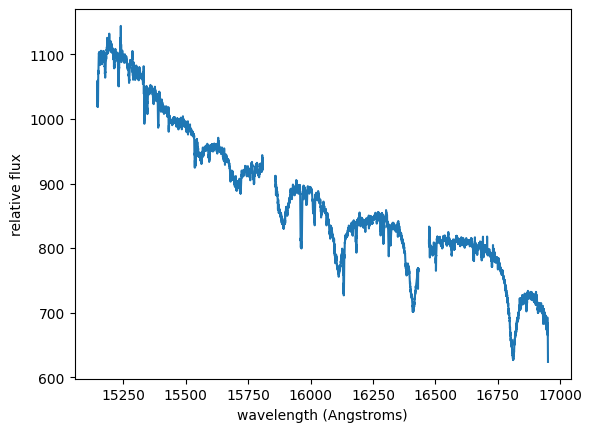

In [26]:
plt.ylabel('relative flux')
plt.xlabel('wavelength (Angstroms)')
plt.plot(ws,f[0])


In [46]:
crval

np.float64(4.179)

In [47]:
cdelt

np.float64(6e-06)

In [48]:
w

array([4.65293254e-310, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 6.32404027e-322])

In [49]:
for k in range(nf):
    w[k] = crval + (cdelt * k)

w = 10.0 ** w
w = w-((-7.506603717803955/299792.458e0)*w)


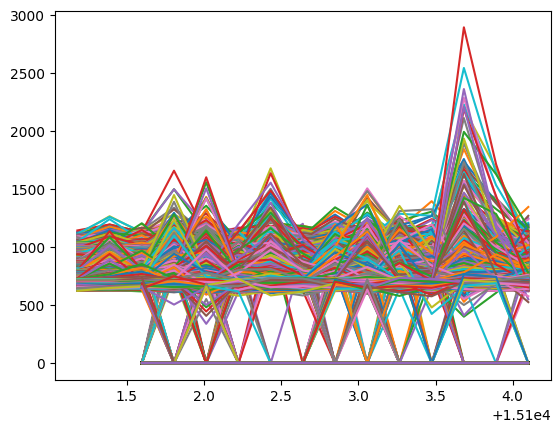

In [51]:
plt.plot(w, f)
plt.show()

In [40]:
data_hdu1 = hdu_list[0].data
data_hdu1

In [41]:
for i in range(1, len(hdu_list)):
    data = hdu_list[i].data
    print(f"HDU {i}:")
    print(data)


HDU 1:
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
HDU 2:
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
HDU 3:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
HDU 4:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
HDU 5:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
HDU 6:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. .

In [15]:
datas = hdu_list[1].data
print(datas)

[[nan nan nan ... nan nan nan]
 [ 0.  0.  0. ...  0.  0.  0.]]


In [4]:
folder_path = 'spectra_images_apogee'



for filename in os.listdir(folder_path):
    if os.path.isfile(os.path.join(folder_path,filename)):
        print(f"nama file: {filename}")
    

nama file: apogee_apo25m_stars_000+08_2M17125087-2403459.fits
nama file: apogee_apo25m_stars_000+12_2M17023928-2129262.fits
nama file: apogee_apo25m_stars_000+16_2M16455992-1945311.fits
nama file: apogee_apo25m_stars_000+30_2M15583523-1044295.fits
nama file: apogee_apo25m_stars_000+30_2M15594124-1047565.fits
nama file: apogee_apo25m_stars_000+30_2M16015093-1053506.fits
nama file: apogee_apo25m_stars_000+30_2M16024746-1037567.fits
nama file: apogee_apo25m_stars_000+30_2M16055250-1000033.fits
nama file: apogee_apo25m_stars_000+45_2M15130498-0018556.fits
nama file: apogee_apo25m_stars_000+45_2M15130930-0124056.fits
nama file: apogee_apo25m_stars_000+45_2M15154939-0011215.fits
nama file: apogee_apo25m_stars_000+45_2M15173444-0041344.fits
nama file: apogee_apo25m_stars_000+45_2M15174199-0049255.fits
nama file: apogee_apo25m_stars_000+45_2M15174577-0102443.fits
nama file: apogee_apo25m_stars_000+45_2M15185169-0009502.fits
nama file: apogee_apo25m_stars_000+60_2M14280006+0851041.fits
nama fil

In [16]:
for i in f[0]:
    print(i)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1022.6692835364825
1042.8950559092414
1046.8518286077099
1027.7234492634727
1035.6787478698238
1057.8269927962313
1040.4067008944323
1059.2365634286414
1027.143

In [19]:
x = np.array([f[0]])


In [20]:
x

array([[nan, nan, nan, ..., nan, nan, nan]], dtype='>f8')

In [37]:
df = pd.read_csv('sdss_spectra_data_bintang_apogee.csv')


In [42]:
result = df.iloc[0]

In [44]:
result['teff']

4941.021

In [39]:
result.get('teff').values[0]

AttributeError: 'numpy.float64' object has no attribute 'values'

In [5]:
folder_path = 'spectra_images_apogee'
df = pd.read_csv('sdss_spectra_data_bintang_apogee.csv')
df2 = pd.read_csv('file_id.csv')
y = []
x = []

count = 0
for filename in os.listdir(folder_path):
    temp_y = []
    if os.path.isfile(os.path.join(folder_path,filename)):
        print(f"nama file: {filename}")
        flux = fits.getdata(f"{folder_path}/{filename}")
        hdr = fits.getheader(f"{folder_path}/{filename}")
        nf = len(flux[0])
        crval = np.double(hdr['CRVAL1'])
        cdelt = np.double(hdr['CDELT1'])
        ws = np.empty(nf)
        for k in range(nf):
            ws[k] = crval + (cdelt*k)
        ws = 10.0**ws
        ws = ws - ((hdr['VHELIO']/299792.458e0)*ws)
        judl = filename.replace("_",".")
        judl = judl.replace(".fits","")
        plt.title(f"{judl.replace('.',' ')}")
        plt.ylabel('relative flux')
        plt.xlabel('wavelength (Angstroms)')
        plt.plot(ws,flux[0])
        os.makedirs("file_image", exist_ok=True)
        filepath = os.path.join("file_image", f"{judl.replace(".","_")}.png")
        plt.savefig(filepath)
        plt.clf()
        
        print(judl)
        id_star = df2.loc[df2['file'] == filename].get('apstar_id').values[0]
        result = df.loc[df['apstar_id']==id_star]
        print(result.get('teff').values[0])
        teff = result.get('teff').values[0]
        logg = result.get('logg').values[0]
        vsin1 = result.get('vsini').values[0]
        m_h = result.get('m_h').values[0]
        temp_y = [teff,logg,vsin1,m_h]
        y.append(temp_y)
        x.append(flux[0])
    count += 1
        
        
        

nama file: apogee_apo25m_stars_000+08_2M17125087-2403459.fits
apogee.apo25m.stars.000+08.2M17125087-2403459
6298.077
nama file: apogee_apo25m_stars_000+12_2M17023928-2129262.fits
apogee.apo25m.stars.000+12.2M17023928-2129262
6296.543
nama file: apogee_apo25m_stars_000+16_2M16455992-1945311.fits
apogee.apo25m.stars.000+16.2M16455992-1945311
6200.323
nama file: apogee_apo25m_stars_000+30_2M15583523-1044295.fits
apogee.apo25m.stars.000+30.2M15583523-1044295
6442.612
nama file: apogee_apo25m_stars_000+30_2M15594124-1047565.fits
apogee.apo25m.stars.000+30.2M15594124-1047565
6145.681
nama file: apogee_apo25m_stars_000+30_2M16015093-1053506.fits
apogee.apo25m.stars.000+30.2M16015093-1053506
6130.048
nama file: apogee_apo25m_stars_000+30_2M16024746-1037567.fits
apogee.apo25m.stars.000+30.2M16024746-1037567
6314.984
nama file: apogee_apo25m_stars_000+30_2M16055250-1000033.fits
apogee.apo25m.stars.000+30.2M16055250-1000033
5177.072
nama file: apogee_apo25m_stars_000+45_2M15130498-0018556.fits
ap

<Figure size 640x480 with 0 Axes>

In [3]:
count

697

In [6]:
for i in x:
    print(len(i))

8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575
8575


In [7]:
y = np.array(y)

In [8]:
y

array([[ 6.298077e+03,  4.065951e+00,  1.883649e+01,  1.567700e-01],
       [ 6.296543e+03,  4.057451e+00,  1.998481e+01,  5.374700e-02],
       [ 6.200323e+03,  4.296364e+00,  8.084627e+00,  1.856300e-01],
       [ 6.442612e+03,  4.128496e+00,  7.609568e+00,  1.255900e-01],
       [ 6.145681e+03,  4.253140e+00,  4.501839e+00, -2.147100e-01],
       [ 6.130048e+03,  4.313282e+00,  8.245557e+00,  5.192800e-04],
       [ 6.314984e+03,  4.459070e+00,  8.407560e+00, -8.556100e-03],
       [ 5.177072e+03,  3.332362e+00,  3.241156e+00, -3.632900e-01],
       [ 6.261898e+03,  4.013795e+00,  6.343077e+00, -2.265800e-01],
       [ 6.159180e+03,  3.716907e+00,  1.168961e+01, -3.774700e-01],
       [ 5.997397e+03,  4.032726e+00,  9.997007e+00, -1.617900e-01],
       [ 4.956895e+03,  3.029606e+00,  3.247880e+00, -2.969500e-01],
       [ 6.326995e+03,  4.016617e+00,  1.228570e+01, -1.507200e-01],
       [ 6.124563e+03,  4.263536e+00,  7.650503e+00, -2.299300e-01],
       [ 6.337235e+03,  4.269946e+

In [9]:
x = np.array(x)

In [10]:
x

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [11]:
print(len(x))
print(len(y))

93
93


In [12]:
from scipy import interpolate
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

2024-09-03 10:34:25.043744: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-03 10:34:25.642213: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-03 10:34:25.857473: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-03 10:34:26.115413: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-03 10:34:26.173443: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-03 10:34:26.468870: I tensorflow/core/platform/cpu_feature_gu

In [13]:
def interpolate_nan(fl):
    nans, x_ = np.isnan(fl), lambda z: z.nonzero()[0]
    fl[nans] = np.interp(x_(nans), x_(~nans), fl[~nans])
    return fl

In [14]:
def normalize_flux_minmax(fl):
    flux_min = np.min(fl)
    flux_max = np.max(fl)
    flux_norm = (fl - flux_min) / (flux_max - flux_min)
    return flux_norm

In [15]:
for i in range(len(x)):
    x[i] = interpolate_nan(x[i])
    x[i] = normalize_flux_minmax(x[i])

In [16]:
x

array([[0.9413752 , 0.9413752 , 0.9413752 , ..., 0.09535156, 0.09535156,
        0.09535156],
       [0.91770913, 0.91770913, 0.91770913, ..., 0.19761517, 0.19761517,
        0.19761517],
       [0.91732356, 0.91732356, 0.91732356, ..., 0.24926168, 0.24926168,
        0.24926168],
       ...,
       [0.73882796, 0.73882796, 0.73882796, ..., 0.0874228 , 0.0874228 ,
        0.0874228 ],
       [0.80709579, 0.80709579, 0.80709579, ..., 0.19074297, 0.19074297,
        0.19074297],
       [0.76682514, 0.76682514, 0.76682514, ..., 0.        , 0.        ,
        0.        ]])

In [17]:
x

array([[0.9413752 , 0.9413752 , 0.9413752 , ..., 0.09535156, 0.09535156,
        0.09535156],
       [0.91770913, 0.91770913, 0.91770913, ..., 0.19761517, 0.19761517,
        0.19761517],
       [0.91732356, 0.91732356, 0.91732356, ..., 0.24926168, 0.24926168,
        0.24926168],
       ...,
       [0.73882796, 0.73882796, 0.73882796, ..., 0.0874228 , 0.0874228 ,
        0.0874228 ],
       [0.80709579, 0.80709579, 0.80709579, ..., 0.19074297, 0.19074297,
        0.19074297],
       [0.76682514, 0.76682514, 0.76682514, ..., 0.        , 0.        ,
        0.        ]])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
X_train

array([[1.        , 1.        , 1.        , ..., 0.20875813, 0.20875813,
        0.20875813],
       [0.88510007, 0.88510007, 0.88510007, ..., 0.17775954, 0.17775954,
        0.17775954],
       [0.60283127, 0.60283127, 0.60283127, ..., 0.0600627 , 0.0600627 ,
        0.0600627 ],
       ...,
       [0.61417066, 0.61417066, 0.61417066, ..., 0.02870483, 0.02870483,
        0.02870483],
       [0.65672242, 0.65672242, 0.65672242, ..., 0.13698355, 0.13698355,
        0.13698355],
       [0.84691474, 0.84691474, 0.84691474, ..., 0.25969759, 0.25969759,
        0.25969759]])

In [20]:
y_train

array([[ 6.152659e+03,  3.738377e+00,  1.499339e+01, -9.779600e-02],
       [ 6.107615e+03,  4.330740e+00,  4.083476e+00,  2.039700e-02],
       [ 5.828784e+03,  4.433148e+00,  3.000613e+00,  2.663300e-02],
       [ 6.146677e+03,  4.219025e+00,  5.093778e+00, -2.490000e-01],
       [ 4.921383e+03,  3.304962e+00,  3.041445e+00, -1.273700e-01],
       [ 6.016604e+03,  4.042669e+00,  7.868102e+00, -4.650400e-02],
       [ 4.956895e+03,  3.029606e+00,  3.247880e+00, -2.969500e-01],
       [ 5.517852e+03,  3.747932e+00,  3.758634e+00,  2.227800e-01],
       [ 6.149872e+03,  3.786534e+00,  6.878757e+00, -2.075900e-01],
       [ 6.106522e+03,  4.061131e+00,  7.459848e+00, -1.864400e-01],
       [ 5.071601e+03,  3.257989e+00,  3.264300e+00, -1.648500e-01],
       [ 6.159180e+03,  3.716907e+00,  1.168961e+01, -3.774700e-01],
       [ 5.950367e+03,  4.206218e+00,  3.322997e+00,  1.238300e-01],
       [ 6.130048e+03,  4.313282e+00,  8.245557e+00,  5.192800e-04],
       [ 5.976025e+03,  4.249131e+

In [21]:
model = Sequential()
model.add(Conv1D(filters=4, kernel_size=3, activation='relu', input_shape=(8575, 1)))
model.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


/home/khalifardy/Dokumen/ruang_kerja/code/kuliah/TA/tugas_akhir/.env/lib64/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 8573, 4)        │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 8571, 16)       │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 2142, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2142, 256)      │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2142, 128)      │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2142, 4)        │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,988 (148.39 KB)

 Trainable params: 37,988 (148.39 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100


2024-09-03 10:36:25.959697: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 70189056 exceeds 10% of free system memory.
2024-09-03 10:36:26.052906: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 35094528 exceeds 10% of free system memory.
2024-09-03 10:36:26.221170: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Incompatible shapes: [32,4] vs. [32,2142,4]
	 [[{{function_node __inference_one_step_on_data_1946}}{{node gradient_tape/compile_loss/mean_squared_error/sub/BroadcastGradientArgs}}]]


InvalidArgumentError: Graph execution error:

Detected at node gradient_tape/compile_loss/mean_squared_error/sub/BroadcastGradientArgs defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/khalifardy/Dokumen/ruang_kerja/code/kuliah/TA/tugas_akhir/.env/lib64/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/khalifardy/Dokumen/ruang_kerja/code/kuliah/TA/tugas_akhir/.env/lib64/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/khalifardy/Dokumen/ruang_kerja/code/kuliah/TA/tugas_akhir/.env/lib64/python3.12/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/khalifardy/Dokumen/ruang_kerja/code/kuliah/TA/tugas_akhir/.env/lib64/python3.12/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib64/python3.12/asyncio/base_events.py", line 641, in run_forever

  File "/usr/lib64/python3.12/asyncio/base_events.py", line 1986, in _run_once

  File "/usr/lib64/python3.12/asyncio/events.py", line 88, in _run

  File "/home/khalifardy/Dokumen/ruang_kerja/code/kuliah/TA/tugas_akhir/.env/lib64/python3.12/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/khalifardy/Dokumen/ruang_kerja/code/kuliah/TA/tugas_akhir/.env/lib64/python3.12/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/khalifardy/Dokumen/ruang_kerja/code/kuliah/TA/tugas_akhir/.env/lib64/python3.12/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/khalifardy/Dokumen/ruang_kerja/code/kuliah/TA/tugas_akhir/.env/lib64/python3.12/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/khalifardy/Dokumen/ruang_kerja/code/kuliah/TA/tugas_akhir/.env/lib64/python3.12/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/khalifardy/Dokumen/ruang_kerja/code/kuliah/TA/tugas_akhir/.env/lib64/python3.12/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/khalifardy/Dokumen/ruang_kerja/code/kuliah/TA/tugas_akhir/.env/lib64/python3.12/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/khalifardy/Dokumen/ruang_kerja/code/kuliah/TA/tugas_akhir/.env/lib64/python3.12/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/home/khalifardy/Dokumen/ruang_kerja/code/kuliah/TA/tugas_akhir/.env/lib64/python3.12/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/home/khalifardy/Dokumen/ruang_kerja/code/kuliah/TA/tugas_akhir/.env/lib64/python3.12/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/khalifardy/Dokumen/ruang_kerja/code/kuliah/TA/tugas_akhir/.env/lib64/python3.12/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/home/khalifardy/Dokumen/ruang_kerja/code/kuliah/TA/tugas_akhir/.env/lib64/python3.12/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/home/khalifardy/Dokumen/ruang_kerja/code/kuliah/TA/tugas_akhir/.env/lib64/python3.12/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/tmp/ipykernel_9482/938891117.py", line 1, in <module>

  File "/home/khalifardy/Dokumen/ruang_kerja/code/kuliah/TA/tugas_akhir/.env/lib64/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/khalifardy/Dokumen/ruang_kerja/code/kuliah/TA/tugas_akhir/.env/lib64/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/home/khalifardy/Dokumen/ruang_kerja/code/kuliah/TA/tugas_akhir/.env/lib64/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/home/khalifardy/Dokumen/ruang_kerja/code/kuliah/TA/tugas_akhir/.env/lib64/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/home/khalifardy/Dokumen/ruang_kerja/code/kuliah/TA/tugas_akhir/.env/lib64/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 70, in train_step

Incompatible shapes: [32,4] vs. [32,2142,4]
	 [[{{node gradient_tape/compile_loss/mean_squared_error/sub/BroadcastGradientArgs}}]] [Op:__inference_one_step_on_iterator_2017]

In [23]:
X_train.shape

(74, 8575)

In [24]:
y_train.shape

(74, 4)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Membangun model Sequential
model = Sequential()

# Conv Layer 1
model.add(Conv1D(filters=4, kernel_size=3, activation='relu', input_shape=(8575, 1)))

# Conv Layer 2
model.add(Conv1D(filters=16, kernel_size=3, activation='relu'))

# Max Pooling
model.add(MaxPooling1D(pool_size=4))

# Flattening
model.add(Flatten())

# Fully Connected Layer 1
model.add(Dense(256, activation='relu'))

# Fully Connected Layer 2
model.add(Dense(128, activation='relu'))

# Output layer untuk empat parameter bintang
model.add(Dense(4, activation='linear'))

# Kompilasi model
model.compile(optimizer='adam', loss='mean_squared_error')

# Melatih model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


2024-09-03 10:36:43.054496: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 35094528 exceeds 10% of free system memory.
2024-09-03 10:36:43.144078: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 35094528 exceeds 10% of free system memory.
2024-09-03 10:36:43.201103: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 35094528 exceeds 10% of free system memory.


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 736ms/step - loss: 9023007.0000 - val_loss: 9047898.0000
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 559ms/step - loss: 8957129.0000 - val_loss: 9016627.0000
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 391ms/step - loss: 8973524.0000 - val_loss: 8959299.0000
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 407ms/step - loss: 8882495.0000 - val_loss: 8863305.0000
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 414ms/step - loss: 8750212.0000 - val_loss: 8710214.0000
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 305ms/step - loss: 8665350.0000 - val_loss: 8475475.0000
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 290ms/step - loss: 8370897.0000 - val_loss: 8127653.0000
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 278ms/step - loss: 8042555.0000 - val_loss: 7628148.0000
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 321ms/step - loss: 7381141.0000 - val_loss: 6931685.5000
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 296ms/step - loss: 6661707.5000 - val_loss: 5992394.5000
Epoch 11/100
3/3 ━━━━━━━━━━━━

In [77]:
f = fits.getdata('apStar-dr17-2M12572368+2625280.fits')
hdr = fits.getheader('apStar-dr17-2M12572368+2625280.fits')
nf = len(f[0])

In [78]:
f

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype='>f8')

In [79]:
flu = f[0]

In [80]:
flu = interpolate_nan(flu)

In [81]:
flu

array([2638.42152356, 2638.42152356, 2638.42152356, ..., 1494.55156605,
       1494.55156605, 1494.55156605], dtype='>f8')

In [82]:
flu = normalize_flux_minmax(flu)

In [83]:
flu

array([0.84021589, 0.84021589, 0.84021589, ..., 0.1888699 , 0.1888699 ,
       0.1888699 ])

In [84]:
model.predict(flu.reshape(1,8575,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 750ms/step


array([[ 6.0418403e+03,  3.8382266e+00,  9.4037771e+00, -1.1373826e+00]],
      dtype=float32)